EV Market Market Analysis


In [157]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical operations
import seaborn as sns  # Seaborn for advanced statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
from scipy.optimize import curve_fit  # SciPy for curve fitting and optimization
from tabulate import tabulate  # Tabulate for pretty-printing tabular data in various formats

# Setting the visual style for Seaborn plots to "whitegrid"
sns.set_style("whitegrid")  # This provides a clean grid background for plots, enhancing readability


Data Loading and Cleaning: Preparing for Analysis


In [239]:
# Load the data from a CSV file into a DataFrame
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Print DataFrame using head() method for a quick view of the first few rows.
# sort_index() is more detailed as it returns the entire DataFrame sorted by index.
ev_data.sort_index()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


Data Types in the Data Set


In [240]:
# Quick use of info() method to gather the dtypes in the document
# info() provides a concise summary of the DataFrame, including column names, non-null counts, and data types
ev_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

Check if there's duplicated values

In [241]:
# The duplicated() method returns a boolean indicating whether each row is a duplicate of a previous row
# It helps in checking for duplicated data within the DataFrame
ev_data.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
177861    False
177862    False
177863    False
177864    False
177865    False
Length: 177866, dtype: bool

Counting Null Values in the Dataset


In [242]:
# Use the isnull() method to retrieve boolean values indicating null entries in the DataFrame
# The .sum() method counts the number of True values for each column, effectively counting the null values
# This provides a quick way to check for missing data in each column
ev_data.isnull().sum()


VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

Eliminating Null Values


In [243]:
# Use the dropna method to eliminate all rows containing null values from the DataFrame
ev_data = ev_data.dropna()

# Re-use isnull().sum to check if the data has been cleaned
# If there are no null values remaining, the sum for each column should be 0
ev_data.isnull().sum()



VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

EV Adoption Over Time


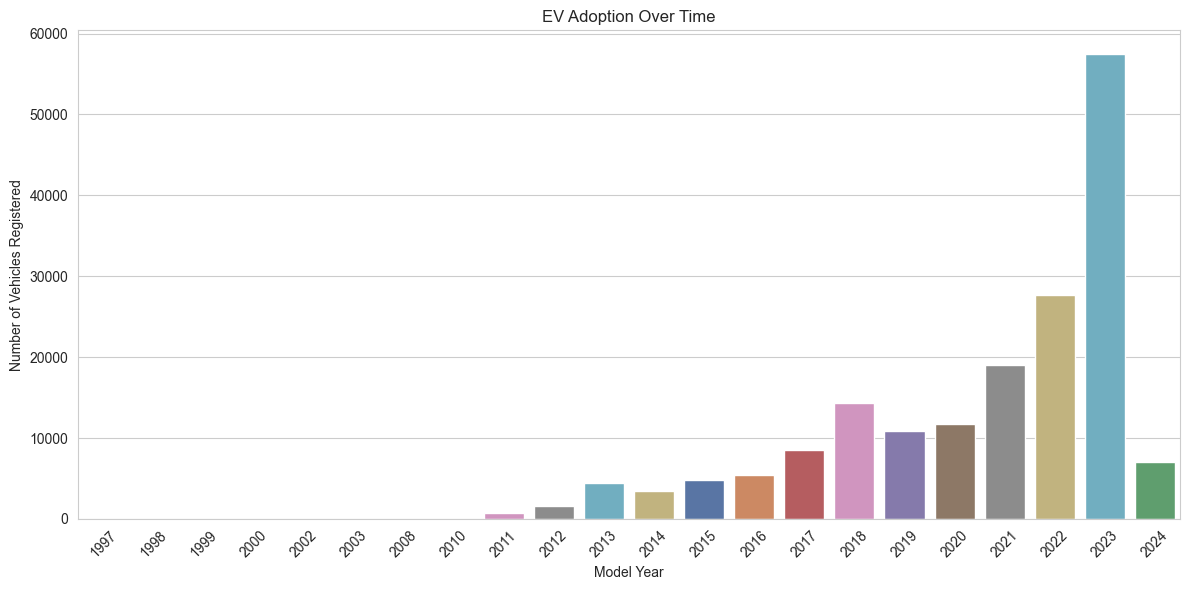

In [244]:
# EV Adoption Over Time

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Calculate the count of electric vehicles for each model year and sort the result by the model year index
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()

# Create a bar plot using Seaborn, with model years on the x-axis and the count of electric vehicles on the y-axis
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, hue=ev_adoption_by_year, palette="deep", legend= False)

# Set the title of the plot
plt.title('EV Adoption Over Time')

# Set the label for the x-axis
plt.xlabel('Model Year')

# Set the label for the y-axis
plt.ylabel('Number of Vehicles Registered')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the layout of the plot to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

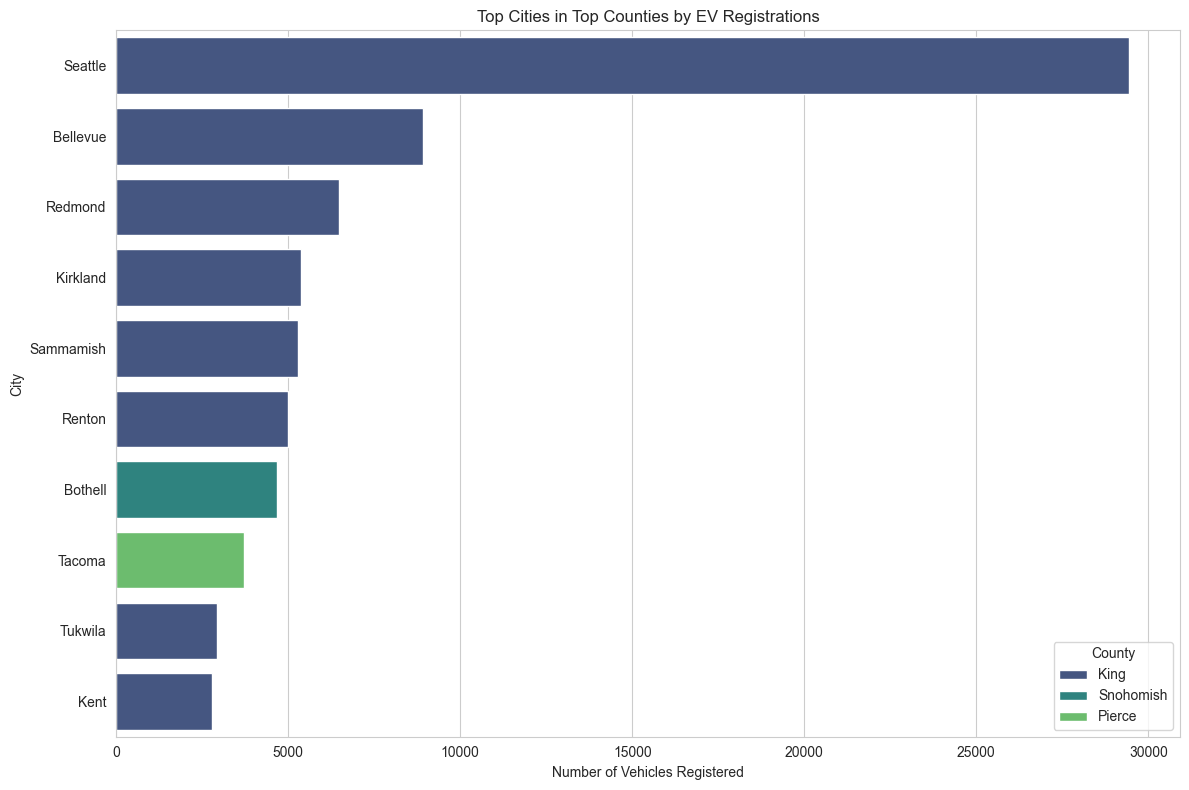

In [246]:
# Check for duplicated DOL Vehicle IDs to ensure uniqueness
check_for_duplicated = ev_data['DOL Vehicle ID'].duplicated().value_counts()  # Using duplicated() to check for duplicate DOL Vehicle IDs

# Get the count of electric vehicles in each county
county_distribution = ev_data['County'].value_counts()  # Using value_counts() to count the number of electric vehicles in each county

# Extract the top 3 counties with the highest counts
top_counties = county_distribution.head(3).index  # Using head() to select the top 3 counties with the highest number of electric vehicles

# Filter the dataset to include only the top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]  # Using isin() to filter the dataset to include only data from the top counties

# Analyze the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')  # Using groupby() and size() to count the number of vehicles in each city within the top counties

# Visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)  # Using head() to select the top 10 cities by the number of vehicles registered

# Create a bar plot to show the top 10 cities in the top counties by EV registrations
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="viridis")  # Using barplot() to create a bar plot showing the distribution of vehicles across cities in the top counties
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()


Let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences.

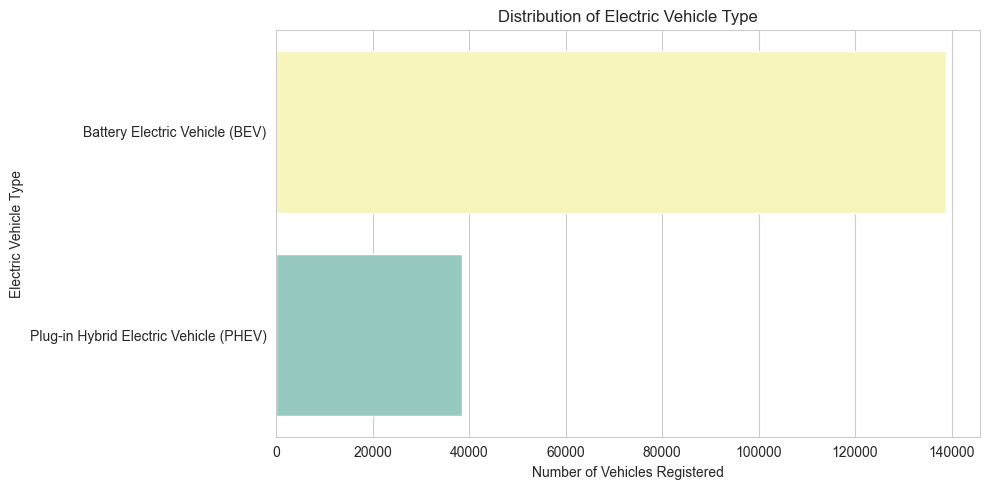

In [247]:
# Filtering and Counting the Values

# Count the occurrences of each electric vehicle type and sort the result by index
ev_type = ev_data['Electric Vehicle Type'].value_counts().sort_index()

plt.figure(figsize=(10, 5))

# Create a bar plot showing the distribution of electric vehicle types
# Using barplot() to create a bar plot with electric vehicle types on the y-axis and their counts on the x-axis
# The hue parameter is included to add another dimension (not used in this case, legend set to False)
sns.barplot(x=ev_type.values, y=ev_type.index, hue = ev_type, legend= False, palette="Set3")
plt.title('Distribution of Electric Vehicle Type')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()


Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. 
Let’s have a look at the most popular manufacturers and then drill down into the most popular models.

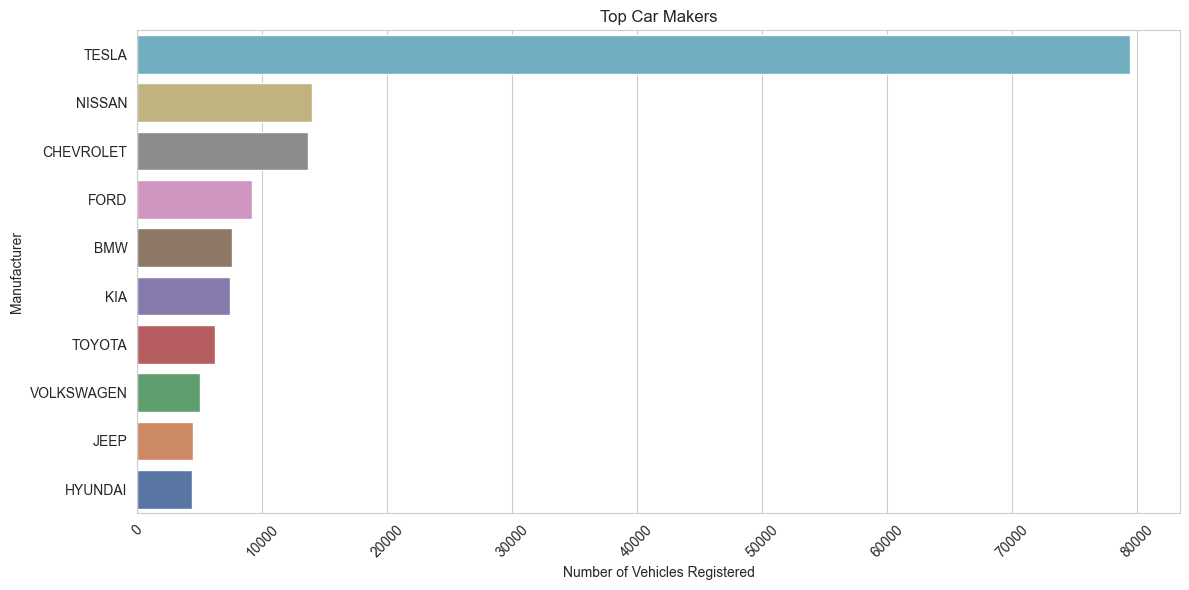

In [248]:
# Top Manufacturers / Make

# Count the occurrences of each car maker and select the top 10
car_makers = ev_data['Make'].value_counts().head(10)

# Plotting

plt.figure(figsize=(12, 6))
# Create a bar plot showing the top car makers
# Using barplot() to create a bar plot with car makers on the y-axis and their counts on the x-axis
# The hue parameter is included to add another dimension (not used in this case, legend set to False)
sns.barplot(x = car_makers.values, y = car_makers.index, hue = car_makers, legend = False, palette= "deep")
plt.title('Top Car Makers')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Manufacturer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

<Axes: xlabel='Number of Vehicles', ylabel='Model'>

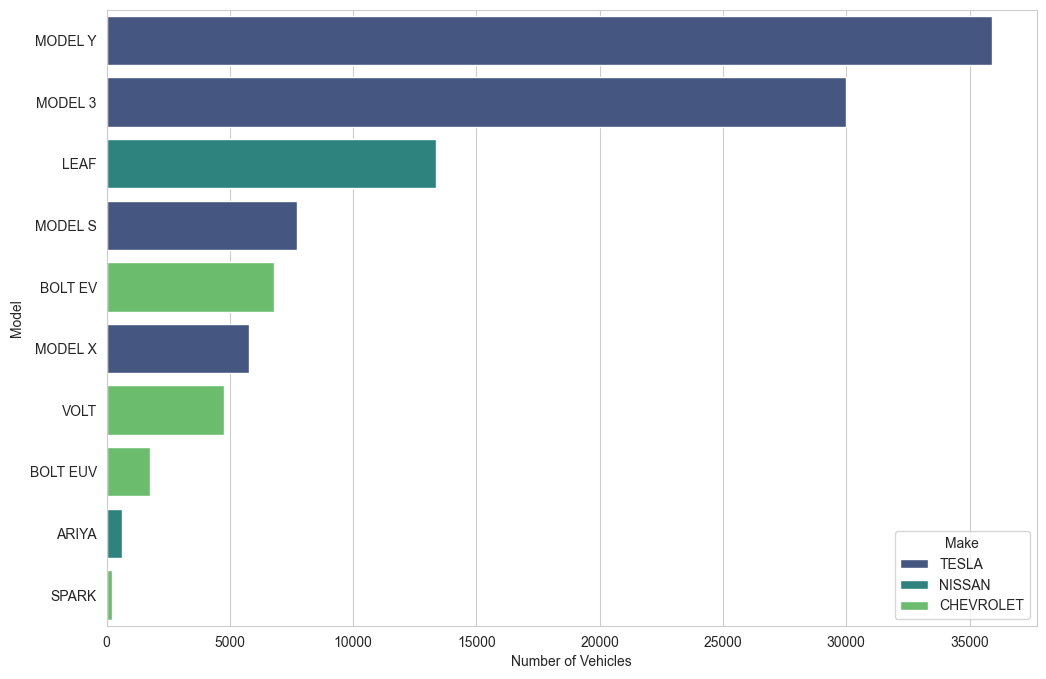

In [251]:
# Top Manufacturers / Make

# Count the occurrences of each car maker and select the top 3
car_makers = ev_data['Make'].value_counts().head(3).index

# Filter the dataset to include only data for the top car makers
sort_models_by_make = ev_data[ev_data['Make'].isin(car_makers)]

# Group the data by car maker and model, and count the number of vehicles for each combination
top_models = sort_models_by_make.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Select the top 10 models by the number of vehicles registered
top_models_10 = top_models.head(10)

# Plotting
plt.figure(figsize=(12,8))
# Create a bar plot showing the top 10 models within the top car makers
# Using barplot() to create a bar plot with models on the y-axis, number of vehicles on the x-axis, and hue for car maker differentiation
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models_10, palette="viridis")


# value_counts(): This method counts the occurrences of each car maker in the dataset, allowing us to identify the most common manufacturers.
# head(3): By using this method, we select the top 3 car makers based on the count obtained in the previous step, focusing our analysis on the most prominent manufacturers.
# isin(): We apply this method to filter the dataset and include only the data corresponding to the top car makers identified earlier, refining our analysis to relevant manufacturers.
# groupby(): This method allows us to group the filtered data by both car maker and model, enabling us to analyze the distribution of vehicle models within each manufacturer.
# size(): Applied within the groupby() operation, this method counts the number of vehicles for each combination of car maker and model.
# sort_values(): After grouping and counting the data, we use this method to sort the results in descending order based on the number of vehicles registered for each model within the top car makers.
# reset_index(): This method resets the index of the DataFrame and assigns a new name to the column containing the counts, ensuring a clean structure for further analysis.
# head(10): Finally, we select the top 10 models within the top car makers to focus our visualization on the most popular models.
# sns.barplot(): Using Seaborn's barplot() function, we create a bar plot to visualize the distribution of the top 10 vehicle models across different manufacturers. The hue parameter is utilized to differentiate between car makers, providing additional insights into the data.

